# Students Performance in Exams

In [178]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

fileName = path + "/StudentsPerformance.csv"

df = pd.read_csv(fileName)

In [179]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [181]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [182]:
df.duplicated().sum()

np.int64(0)

In [183]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [184]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

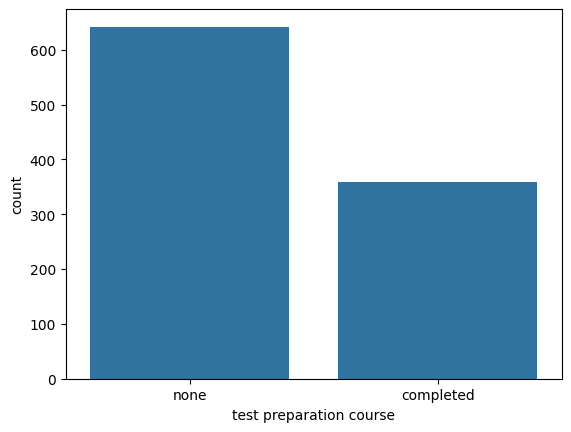

In [185]:
sns.countplot(data=df, x="test preparation course")
plt.show()

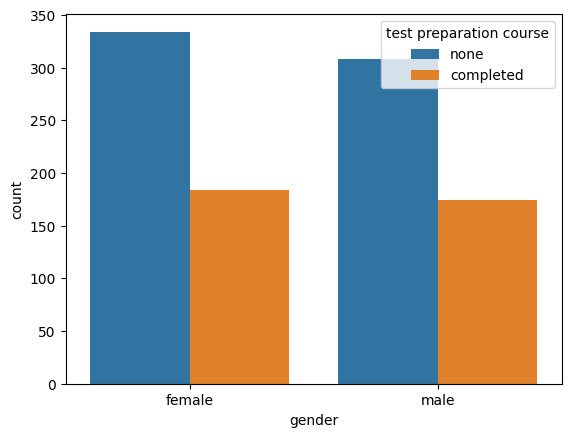

In [186]:
sns.countplot(data=df, x="gender", hue="test preparation course")

plt.show()

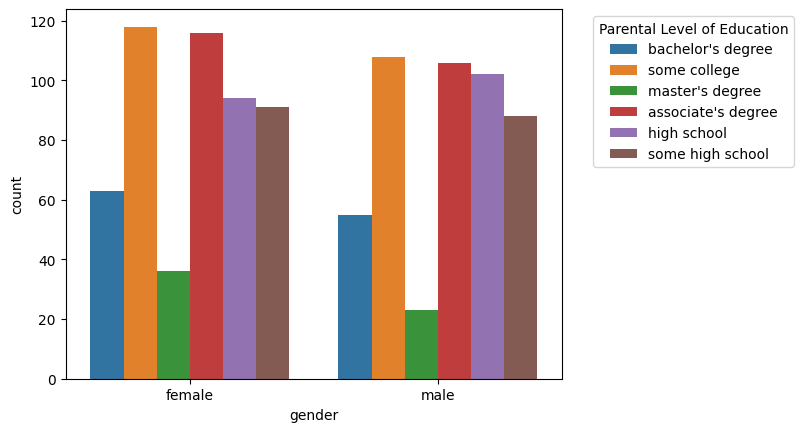

In [187]:
sns.countplot(data=df, x="gender", hue="parental level of education")

plt.legend(title="Parental Level of Education", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

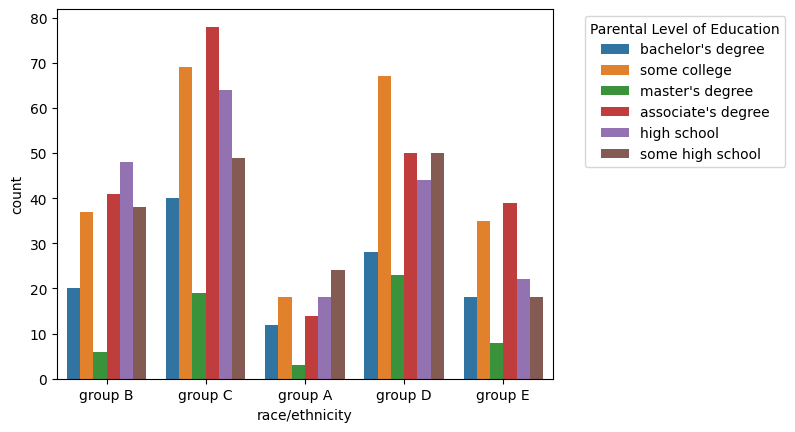

In [188]:
sns.countplot(data=df, x="race/ethnicity", hue="parental level of education")

plt.legend(title="Parental Level of Education", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

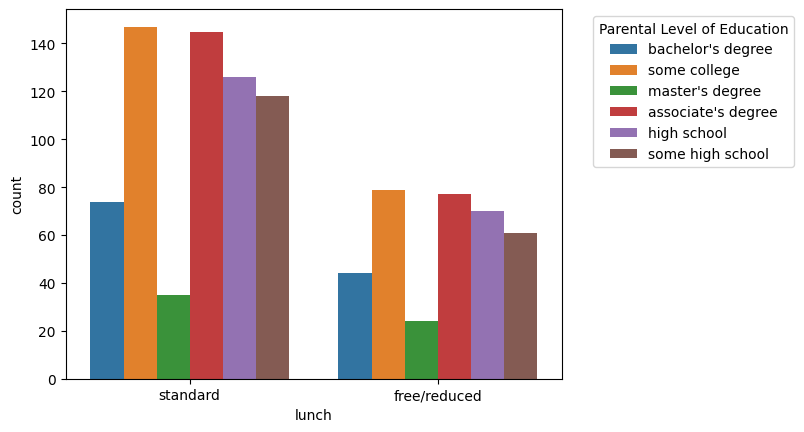

In [189]:
sns.countplot(data=df, x="lunch", hue="parental level of education")
plt.legend(title="Parental Level of Education", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

skewness of math score:-0.27893514909431694
skewness of reading score:-0.25910451810923063
skewness of writing score:-0.28944397150761897


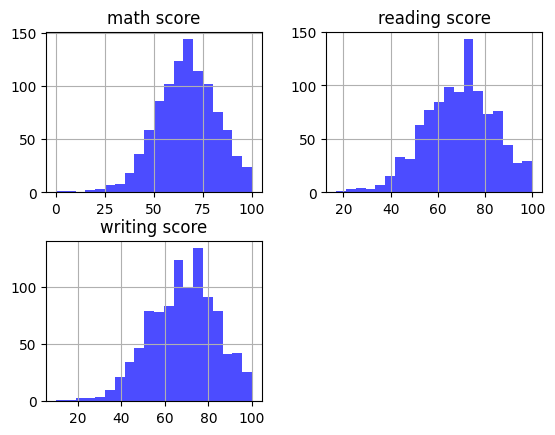

In [190]:
numbers = df.select_dtypes(exclude=['object']).columns

for n in numbers:
    print(f"skewness of {n}:{df[n].skew()}")

df.hist(bins=20, color='blue', alpha=0.7)
plt.show()

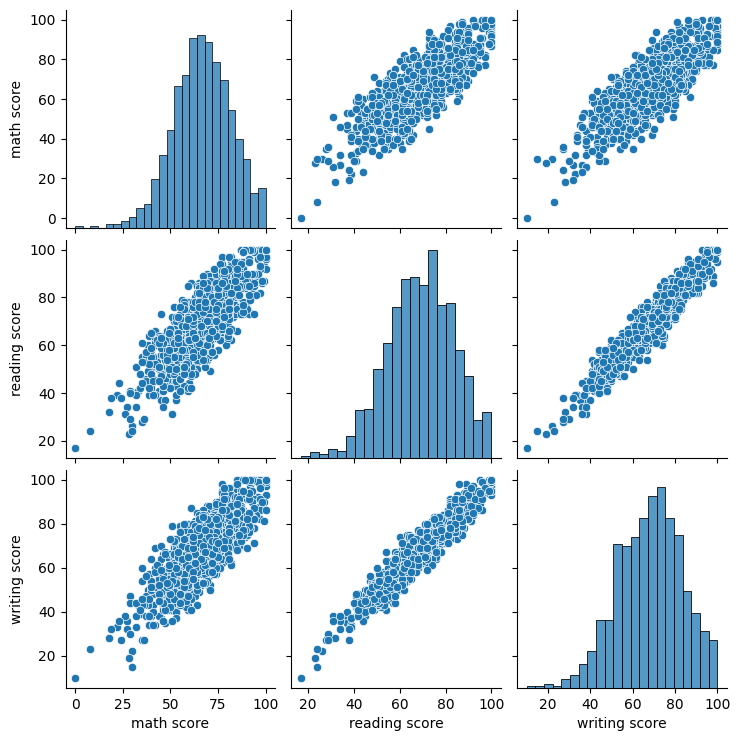

In [191]:
sns.pairplot(df)
plt.show()

# Engenharia

<Axes: xlabel='mean score', ylabel='Count'>

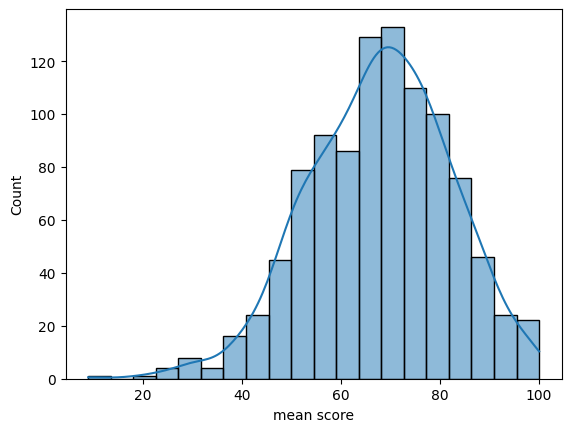

In [192]:
df['mean score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
sns.histplot(df['mean score'], bins=20, kde=True)

In [193]:
df['performance'] = df['mean score'] > 70

In [194]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,True
1,female,group C,some college,standard,completed,69,90,88,82.333333,True
2,female,group B,master's degree,standard,none,90,95,93,92.666667,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,False
4,male,group C,some college,standard,none,76,78,75,76.333333,True


In [195]:
df['score category'] = pd.cut(df['mean score'], bins=[0, 50, 70, 100], labels=['low', 'medium', 'high'])
df['score category'].value_counts()

score category
high      447
medium    444
low       109
Name: count, dtype: int64

In [196]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,performance,score category
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,True,high
1,female,group C,some college,standard,completed,69,90,88,82.333333,True,high
2,female,group B,master's degree,standard,none,90,95,93,92.666667,True,high
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,False,low
4,male,group C,some college,standard,none,76,78,75,76.333333,True,high


In [197]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
obj_cols = df.select_dtypes(include=['object']).columns
for col in obj_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,performance,score category
0,0,1,1,1,1,72,72,74,72.666667,True,high
1,0,2,4,1,0,69,90,88,82.333333,True,high
2,0,1,3,1,1,90,95,93,92.666667,True,high
3,1,0,0,0,1,47,57,44,49.333333,False,low
4,1,2,4,1,1,76,78,75,76.333333,True,high


In [198]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['mean score', 'performance', 'score category'])
y = df['performance']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

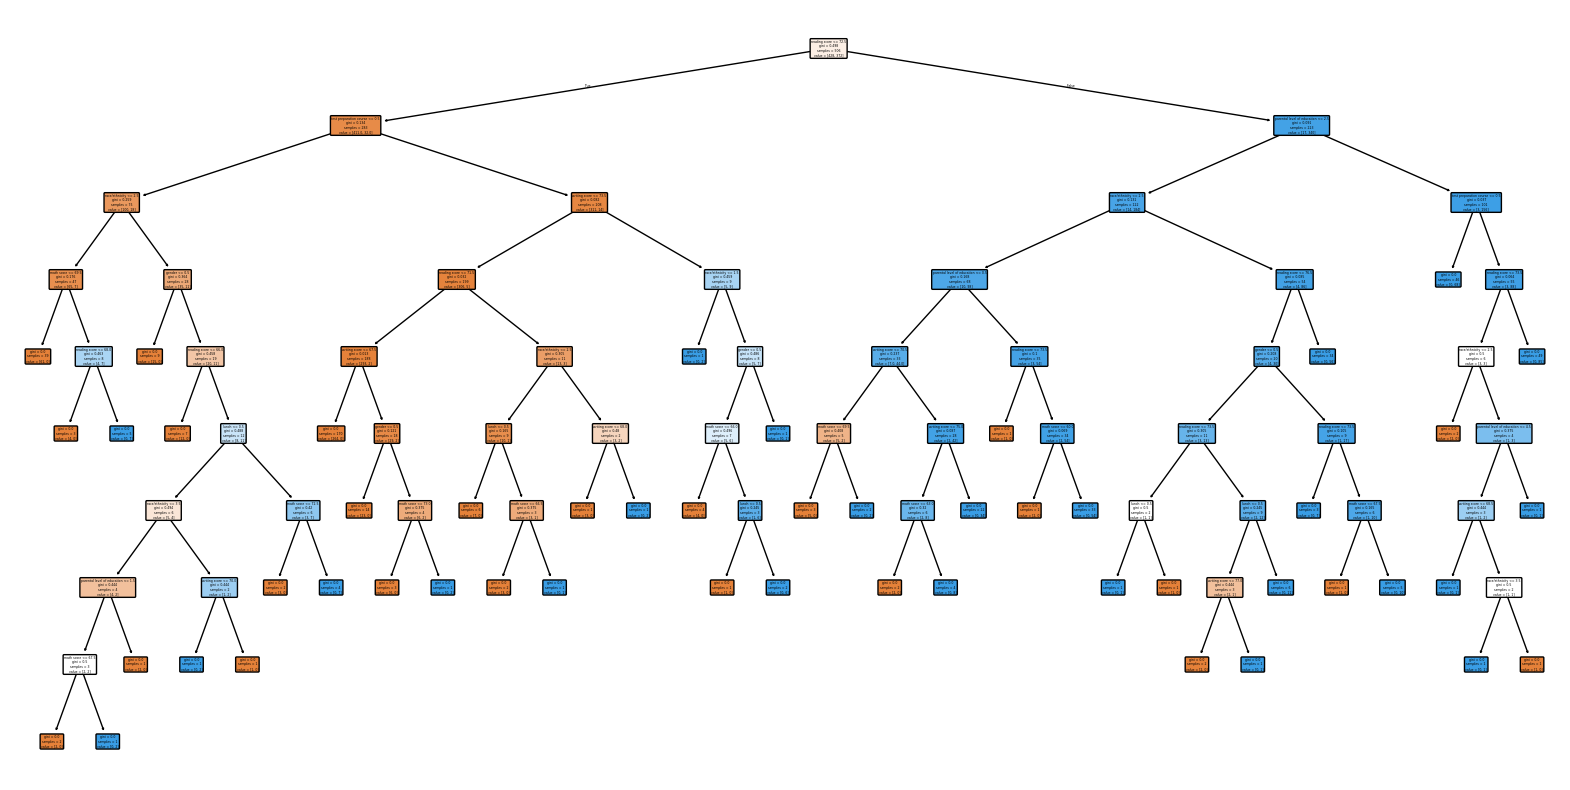

In [201]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [202]:
y_pred = dt.predict(X_test)

In [203]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [204]:
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

       False       0.97      0.98      0.98       112
        True       0.98      0.97      0.97        88

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

Accuracy: 0.975


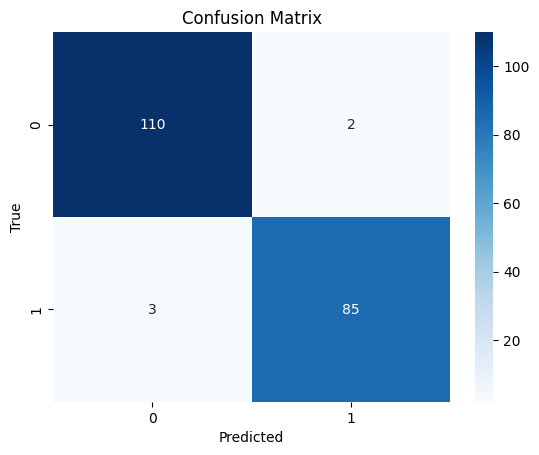

In [205]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

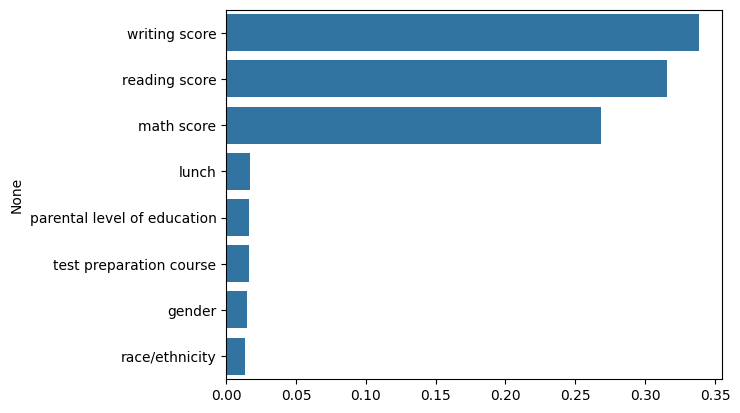

In [206]:
importances = rf.feature_importances_
feature_names = X.columns
indices = importances.argsort()[::-1]

sns.barplot(x=importances[indices], y=feature_names[indices])
plt.show()